In [1]:
import numpy as np
import pandas as pd

In [7]:
data=pd.read_csv("D:\\python datasets\\covid19_tweets.csv")

In [138]:
data.dropna()
data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [256]:
data['hashtags']

0                                       NaN
1                                       NaN
2                               ['COVID19']
3                               ['COVID19']
4         ['CoronaVirusUpdates', 'COVID19']
                        ...                
147596                          ['COVID19']
147597                                  NaN
147598                          ['COVID19']
147599                          ['COVID19']
147600                          ['COVID19']
Name: hashtags, Length: 147601, dtype: object

In [8]:
data.describe()

,user_followers,user_friends,user_favourites
count,1.476010e+05,147601.000000,1.476010e+05
mean,1.096936e+05,2089.351569,1.415404e+04
std,8.350865e+05,9067.479411,4.357275e+04
min,0.000000e+00,0.000000,0.000000e+00
25%,1.730000e+02,148.000000,2.020000e+02
50%,1.003000e+03,541.000000,1.750000e+03
75%,5.353000e+03,1712.000000,9.148000e+03
max,4.944256e+07,497363.000000,2.047197e+06


In [10]:
data.isnull().count()

user_name           147601
user_location       147601
user_description    147601
user_created        147601
user_followers      147601
user_friends        147601
user_favourites     147601
user_verified       147601
date                147601
text                147601
hashtags            147601
source              147601
is_retweet          147601
dtype: int64

In [12]:
pd.DatetimeIndex(data['date']).month.unique()

Int64Index([7, 8], dtype='int64', name='date')

In [71]:
july=data["user_location"][pd.DatetimeIndex(data['date']).month == 7].value_counts()
august=data["user_location"][pd.DatetimeIndex(data['date']).month == 8].value_counts()
total_data=(july+august).sort_values(ascending=False)

In [62]:
import plotly.express as px
fig = px.bar(july[0:15],title="top 15 countries in the july month")
fig.show()

In [65]:
import plotly.express as px
fig = px.bar(august[0:15],title="top 15 countries in the august month")
fig.show()

In [75]:
import plotly.express as px
fig = px.bar(total_data[0:10],title="top 15 countries in the july month")
fig.show()

In [179]:
df=data['hashtags']

In [180]:
df

0                                       NaN
1                                       NaN
2                               ['COVID19']
3                               ['COVID19']
4         ['CoronaVirusUpdates', 'COVID19']
                        ...                
147596                          ['COVID19']
147597                                  NaN
147598                          ['COVID19']
147599                          ['COVID19']
147600                          ['COVID19']
Name: hashtags, Length: 147601, dtype: object

In [257]:
 count_hash = data[["hashtags", "date"]]

In [258]:
f=count_hash[count_hash["hashtags"]=="['COVID19']"]
f

,hashtags,date
2,['COVID19'],2020-07-25 12:27:14
3,['COVID19'],2020-07-25 12:27:10
12,['COVID19'],2020-07-25 12:26:47
13,['COVID19'],2020-07-25 12:26:47
24,['COVID19'],2020-07-25 12:26:28
...,...,...
147586,['COVID19'],2020-08-17 03:04:21
147596,['COVID19'],2020-08-17 03:03:50
147598,['COVID19'],2020-08-17 03:03:46
147599,['COVID19'],2020-08-17 03:03:42


In [259]:
import plotly.express as px
fig = px.bar(f[0:30],x='date',color='hashtags')
fig.show()

# SENTIMENT ANALYSIS

In [262]:
data.tail()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
147596,Ankush,"Kolkata, India","Bong, Traveller & Amateur Photographer\n💓👉🏽🇮🇳\...",2014-04-21 17:41:03,401,558,9791,False,2020-08-17 03:03:50,With a Population of 13 Crore People the Total...,['COVID19'],Twitter for Android,False
147597,Woodson Jones,"San Antonio, TX","Vice Dean of GME/Professor of Pediatrics, Long...",2016-09-10 04:27:31,46,40,10,False,2020-08-17 03:03:49,Thanks to you and all of the surgery residents...,NaN,Twitter for iPhone,False
147598,Mighty Joe Young #MakeGoodTrouble #BidenHarris...,"Manchester, CT","Future Legislator, U.S Senator and U.S Preside...",2014-02-24 13:55:53,16549,18202,304511,False,2020-08-17 03:03:46,I have tested NEGATIVE for #COVID19!!!!!,['COVID19'],Twitter for Android,False
147599,Topwristband.com,NaN,https://t.co/ps8nCcP40p is a website with its ...,2019-09-16 08:14:28,170,504,904,False,2020-08-17 03:03:42,Wear a Mask to help reduce the spread of #COVI...,['COVID19'],Twitter Web App,False
147600,Nextlevltherapy,NaN,Licensed Professional Therapist in private pra...,2020-07-22 14:48:24,0,57,18,False,2020-08-17 03:03:36,"In the midst of #COVID19, use these tricks to ...",['COVID19'],Social Genie by Brighter Vision,False


In [266]:
from collections import Counter

def draw_bar_graph_for_text_visualization(df, location):
    tweets_from_loc = df.loc[df.user_location==location]
    tweets_from_loc.loc[:, 'text'] = tweets_from_loc['text'].apply(punctuation_stopwords_removal)
    loc_tweets_curated = tweets_from_loc['text'].tolist()
    loc_tweet_list = []
    for sublist in loc_tweets_curated:
        for word in sublist:
            loc_tweet_list.append(word)
    loc_tweet_count = Counter(loc_tweet_list)
    loc_top_30_words = pd.DataFrame(loc_tweet_count.most_common(50), columns=['word', 'count'])
    fig, ax = plt.subplots(figsize=(16, 6))
    sns.barplot(x='word', y='count', 
                data=loc_top_30_words, ax=ax)
    plt.title("Top 50 Prevelant Words in {}".format(location))
    plt.xticks(rotation='vertical');

In [269]:
 !pip install wordcloud

In [270]:
from wordcloud import WordCloud, STOPWORDS



def draw_word_cloud(df, location, title):
    loc_df = df.loc[df.user_location==location]
    loc_df.loc[:, 'text'] = loc_df['text'].apply(punctuation_stopwords_removal)
    word_cloud = WordCloud(
                    background_color='white',
                    stopwords=set(STOPWORDS),
                    max_words=50,
                    max_font_size=40,
                    scale=5,
                    random_state=1).generate(str(loc_df['text']))
    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(word_cloud)
    plt.show()

In [271]:
stopwords_ = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        collocations=False,
        background_color='white',
        stopwords=stopwords_,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

In [281]:
from string import punctuation
from nltk.corpus import stopwords
print(stopwords.words('english')[10:15])

def punctuation_stopwords_removal(sms):
    # filters charecter-by-charecter : ['h', 'e', 'e', 'l', 'o', 'o', ' ', 'm', 'y', ' ', 'n', 'a', 'm', 'e', ' ', 'i', 's', ' ', 'p', 'u', 'r', 'v', 'a']
    remove_punctuation = [ch for ch in sms if ch not in punctuation]
    # convert them back to sentences and split into words
    remove_punctuation = "".join(remove_punctuation).split()
    filtered_sms = [word.lower() for word in remove_punctuation if word.lower() not in stopwords.words('english')]
    return filtered_sms

["you've", "you'll", "you'd", 'your', 'yours']


In [279]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Lakide
[nltk_data]     Vinay\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

C:\Users\Lakide Vinay\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



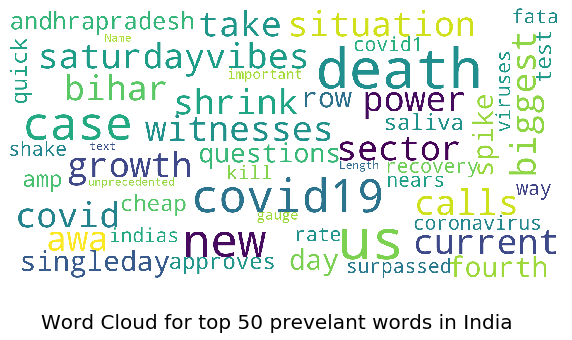

In [282]:
draw_word_cloud(data, 'India', 'Word Cloud for top 50 prevelant words in India')

C:\Users\Lakide Vinay\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



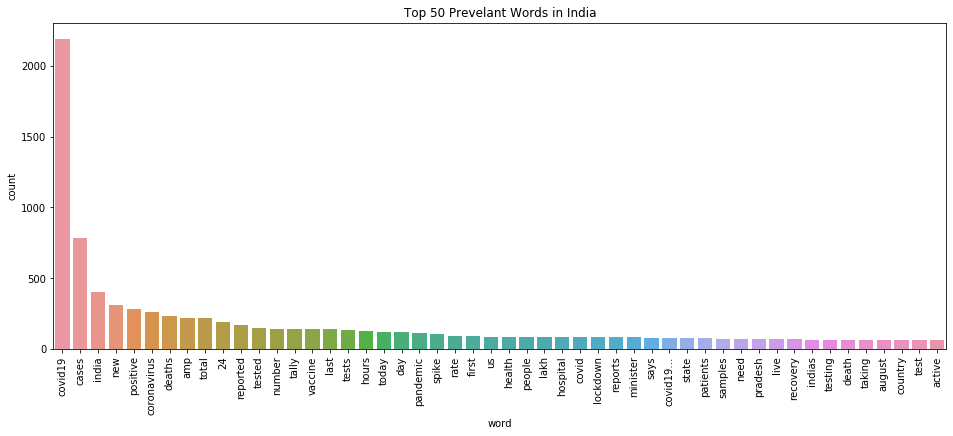

In [284]:
import seaborn as sns
draw_bar_graph_for_text_visualization(data, 'India')

In [295]:
import plotly.express as px
fig = px.scatter_geo(data, user_location="alpha3",
                     size="text",
                     animation_frame="day",
                     projection="natural earth", width=800, height=600, title='Tweets from different countries for every day')
fig.show()

TypeError: scatter_geo() got an unexpected keyword argument 'user_location'